# **Intel Image Classification**

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import os
import matplotlib.pyplot as plt

## Importing Data

In [2]:
file_path = r'C:\Users\Matúš\.jupyter\csv\intel_cls'

In [3]:
train_path = os.path.join(file_path, 'seg_train\seg_train')
test_path = os.path.join(file_path, 'seg_test\seg_test')
pred_path = os.path.join(file_path, 'seg_pred')

In [4]:
cls_names = os.listdir(train_path)
n_classes = len(os.listdir(train_path))

In [5]:
images_in_each_class = []
for cls in os.listdir(train_path):
    images_in_each_class.append(len(os.listdir(os.path.join(train_path, cls))))

In [6]:
n_train_images = np.sum(images_in_each_class)

## Analyzing Data

In [7]:
for cls in os.listdir(train_path):
    n_images = len(os.listdir(os.path.join(train_path, cls)))
    print(f'{cls}:    \t {n_images} \t {100*(n_images / n_train_images):.2f}%')

buildings:    	 2191 	 15.61%
forest:    	 2271 	 16.18%
glacier:    	 2404 	 17.13%
mountain:    	 2512 	 17.90%
sea:    	 2274 	 16.20%
street:    	 2382 	 16.97%


buildings


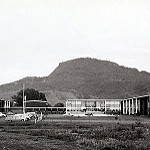

forest


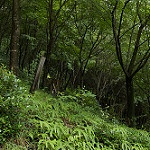

glacier


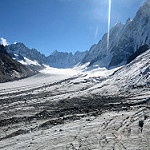

mountain


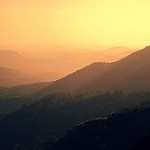

sea


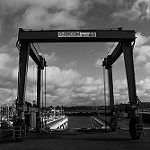

street


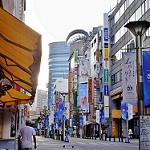

In [8]:
from IPython.display import Image



for idx, cls in enumerate(os.listdir(train_path)):
    sample = os.listdir(os.path.join(train_path, cls))[0]  # First image from each class
    print(cls)
    display(Image(filename=os.path.join(train_path, cls, sample)))


In [9]:
import PIL.Image
from collections import Counter


def sizes_of_images(directory):
    
    sizes = Counter()
    
    for cls in os.listdir(directory):
        for i in range(len(os.listdir(os.path.join(directory, cls)))):
            sample = os.listdir(os.path.join(directory, cls))[i]
            sizes.update([PIL.Image.open(os.path.join(directory, cls, sample)).size])

    return sizes

This function returns all unique image shapes with corresponding number of images which have the same shape

In [10]:
images_sizes = sizes_of_images(train_path)  

In [11]:
images_sizes.most_common(5)

[((150, 150), 13986),
 ((150, 113), 7),
 ((150, 135), 3),
 ((150, 111), 3),
 ((150, 108), 2)]

As we can see almost all images have shape 150x150, hence we will preprocessed images with differnt shape to the shape of 150x150 using the ImageDataGenerator

## Preparing Data

In [12]:
# Data Augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,
                                                             rotation_range=20,
                                                             horizontal_flip=True,
                                                             width_shift_range=0.2)

train_generator = train_datagen.flow_from_directory(train_path, 
                                                   batch_size=32, 
                                                   target_size=(150, 150),
                                                   class_mode="categorical",
                                                   shuffle=True,
                                                   seed=42)

Found 14034 images belonging to 6 classes.


In [13]:
test_datagen = keras.preprocessing.image.ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_path, 
                                                  batch_size=32, 
                                                  target_size=(150, 150),
                                                  class_mode="categorical",
                                                  shuffle=True,
                                                  seed=42)

Found 3000 images belonging to 6 classes.


## Creating a Model

In [14]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=train_generator.image_shape),
    
    keras.layers.Conv2D(64, kernel_size=(5, 5), strides=2, activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(n_classes, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 73, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(train_generator, epochs=10,
          callbacks=[keras.callbacks.EarlyStopping(patience=2)],
          validation_data=test_generator)

c:\python\python386\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
439/439 [==============================] - 198s 452ms/step - loss: 0.9968 - accuracy: 0.6143 - val_loss: 0.7572 - val_accuracy: 0.7190
Epoch 2/10
439/439 [==============================] - 199s 454ms/step - loss: 0.7051 - accuracy: 0.7467 - val_loss: 0.6172 - val_accuracy: 0.7830
Epoch 3/10
439/439 [==============================] - 199s 453ms/step - loss: 0.6336 - accuracy: 0.7746 - val_loss: 0.6067 - val_accuracy: 0.7853
Epoch 4/10
439/439 [==============================] - 200s 455ms/step - loss: 0.5804 - accuracy: 0.7918 - val_loss: 0.6164 - val_accuracy: 0.7880
Epoch 5/10
439/439 [==============================] - 201s 458ms/step - loss: 0.5406 - accuracy: 0.8031 - val_loss: 0.6030 - val_accuracy: 0.7990
Epoch 6/10
439/439 [==============================] - 203s 461ms/step - loss: 0.5195 - accuracy: 0.8109 - val_loss: 0.4976 - val_accuracy: 0.8237
Epoch 7/10
439/439 [==============================] - 201s 457ms/step - loss: 0.4961 - accuracy: 0.8231 - val_loss: 0.4584 -

## Predicting

In [18]:
pred_datagen = keras.preprocessing.image.ImageDataGenerator()
pred_generator = pred_datagen.flow_from_directory(pred_path, 
                                                  batch_size=1, 
                                                  target_size=(150, 150),
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 7301 images belonging to 1 classes.


In [19]:
def plot_predictions(model, data_generator, cls_names, n_rows=5, n_cols=5, figsize=(16, 16)):
    
    plt.figure(figsize=figsize)

    predictions = model.predict(data_generator)
    cls_predictions = np.argmax(predictions, axis=1)

    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i+1)
        plt.axis('off')
        
        name_of_prediction = cls_names[cls_predictions[i]]
        probabilities = predictions.max(axis=1)[i]
        
        plt.title(f'{name_of_prediction} - {(100*probabilities):.2f}%', fontsize=14)
        plt.tight_layout()
        plt.imshow(pred_generator[i][0] / 255);

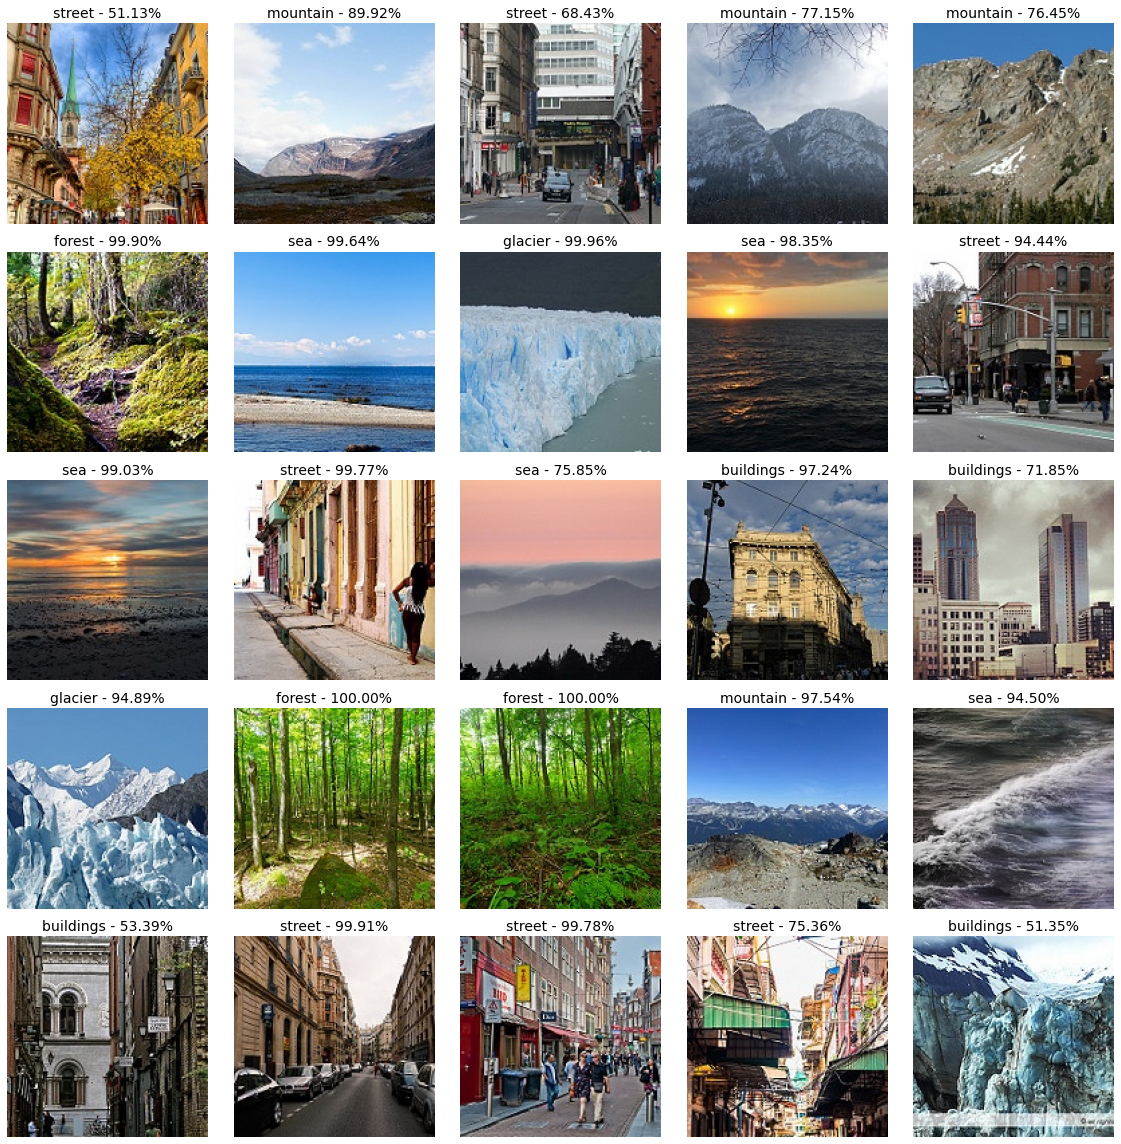

In [22]:
plot_predictions(model, pred_generator, cls_names)

****

In [ ]:
model.save(r'C:\Users\Matúš\.jupyter\models\intel.h5')
model.save_weights(r'C:\Users\Matúš\.jupyter\models\intel_weights.h5')

In [ ]:
# loaded_model = keras.models.load_model(r'C:\Users\Matúš\.jupyter\models\intel.h5')

***

## Predicting using Pretrained Model (ResNet)

In [56]:
resnet = keras.applications.resnet50.ResNet50(include_top=False, input_shape=train_generator.image_shape)

In [57]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [58]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(resnet.output)
x = keras.layers.Dense(256, activation='relu')(global_average_layer)
output = keras.layers.Dense(n_classes, activation='softmax')(x)

pretrained_model = keras.models.Model(inputs=[resnet.inputs],
                                      outputs=[output])

In [59]:
for layer in pretrained_model.layers[:-18]:  # freezing pretrained layers excluding last 15 layers and 3 top layers
    layer.trainable = False

In [60]:
pretrained_model.compile(loss='categorical_crossentropy',
                         optimizer=keras.optimizers.Adam(learning_rate=0.05),
                         metrics=['accuracy'])

In [61]:
pretrained_model.fit(train_generator, epochs=3, validation_data=test_generator)

Epoch 1/3
439/439 [==============================] - 711s 2s/step - loss: 1.3158 - accuracy: 0.8104 - val_loss: 0.3947 - val_accuracy: 0.8757
Epoch 2/3
439/439 [==============================] - 695s 2s/step - loss: 0.3964 - accuracy: 0.8749 - val_loss: 0.3922 - val_accuracy: 0.8853
Epoch 3/3
439/439 [==============================] - 686s 2s/step - loss: 0.3570 - accuracy: 0.8897 - val_loss: 0.4456 - val_accuracy: 0.8723


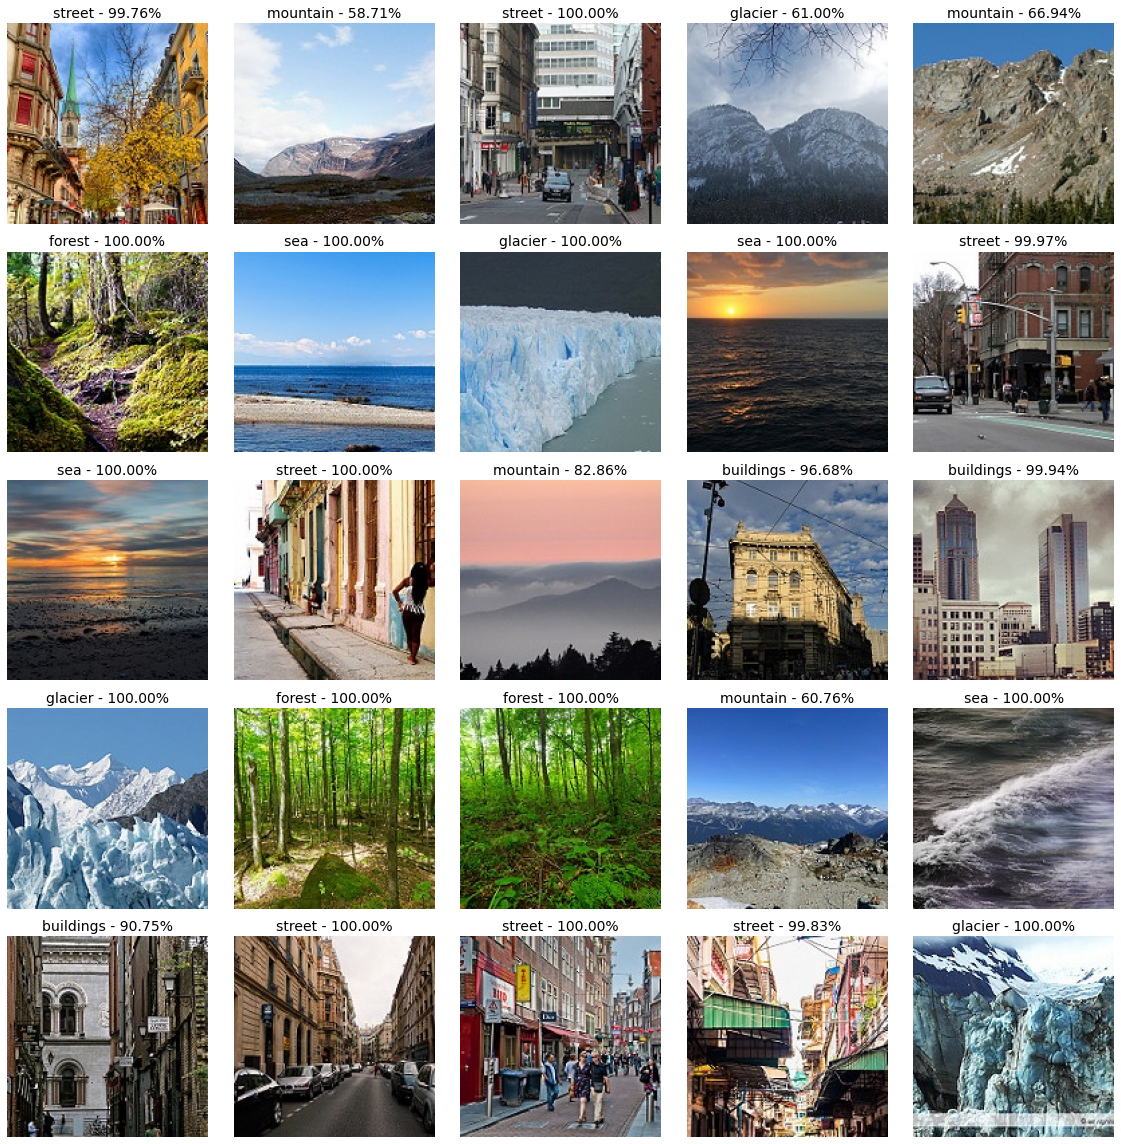

In [63]:
plot_predictions(pretrained_model, pred_generator, cls_names)

In [62]:
pretrained_model.save(r'C:\Users\Matúš\.jupyter\models\intel_pretrained.h5')
pretrained_model.save_weights(r'C:\Users\Matúš\.jupyter\models\intel_weights_pretrained.h5')

In [ ]:
# loaded_pretrained_model = keras.models.load_model(r'C:\Users\Matúš\.jupyter\models\intel_pretrained.h5')